In [150]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 
from sklearn.datasets import make_regression

from sklearn import metrics
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27

In [151]:
df = pd.read_json(r"data_harvest_clean.json", dtype={'code_postal': 'str'})
df.head()

,marque,modele,date_fabrication,kilometrage,couleur,carrosserie,code_postal,energie,emission,consommation,transmission,portes,sieges,cv_fiscaux,cv_reels,prix_vente
0,dacia,duster,2019,18300,blanc,4x4,86130,essence,0,0.0,manuelle,4,5,7,130,17600
1,mini,cooper,2018,47500,rouge foncé,berline,59240,essence,119,0.0,automatique,2,4,10,192,24990
2,nissan,qashqai,2013,166400,gris,break,53000,diesel,129,0.0,manuelle,4,5,6,110,8490
3,nissan,qashqai,2016,61500,gris foncé,4x4,1300,diesel,128,4.9,automatique,4,5,7,130,16900
4,mini,cooper,2018,58529,gris,berline,30200,diesel,99,0.0,manuelle,4,5,5,95,17900


In [152]:
df.dtypes

marque               object
modele               object
date_fabrication      int64
kilometrage           int64
couleur              object
carrosserie          object
code_postal          object
energie              object
emission              int64
consommation        float64
transmission         object
portes                int64
sieges                int64
cv_fiscaux            int64
cv_reels              int64
prix_vente            int64
dtype: object

<AxesSubplot:>

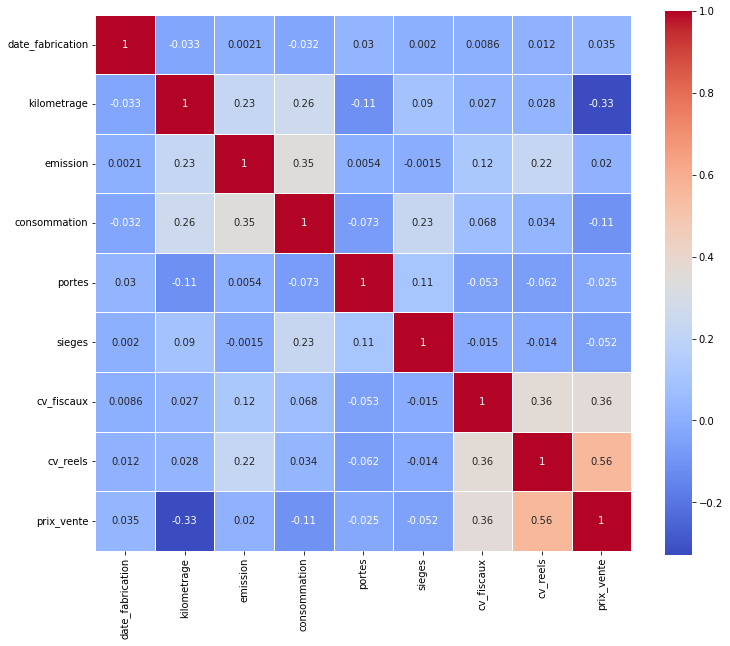

In [153]:
cor = df.corr() 

plt.subplots(figsize=(12,10))
sns.heatmap(cor, 
            square = True, 
            cmap="coolwarm",
            linewidths=0.5,
            annot=True )

In [154]:
df['transmission'].value_counts(normalize=True)

manuelle            0.384830
automatique         0.317335
0                   0.262666
semi automatique    0.034357
autres              0.000812
Name: transmission, dtype: float64

In [155]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df['transmission'] = df['transmission'].astype('str')
categorielle = df[["marque",'modele','couleur','energie','transmission','code_postal']].astype('str')
cat_var = ['marque','modele','couleur','energie','transmission','code_postal']

categorielle_encoder = OneHotEncoder(handle_unknown='ignore')

categorielle_encoder.fit(categorielle)
#enc_df = pd.DataFrame(categorielle_encoder.transform(categorielle).toarray())
ct = ColumnTransformer(transformers=[("cat",categorielle_encoder,cat_var)])
enc_df = ct.fit_transform(df)
# pour le récupérer en pickel il faut l'entrainer 
# preprocessing = ColumnTransformer(
# [
#         ("cat", categorielle_encoder, categorielle)
#     ]
# )

# exemple pipeline 

#pipeline = Pipeline(steps=[("preproc", categorielle_encoder),("model",DecisionTreeRegressor())])

# pour récupérer le preprocessing 
# pipeline["preproc"]
# pour entrainer la pipeline 
# pipeline.fit(X,y)


AttributeError: 'ColumnTransformer' object has no attribute 'fit_transofrm'

In [ ]:
enc_df.head(
)

,0,1,2,3,4,5,6,7,8,9,...,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
categorielle_encoder.categories_

[array(['abarth', 'audi', 'bmw', 'citroen', 'dacia', 'dodge', 'fiat',
        'ford', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia',
        'land-rover', 'lexus', 'maserati', 'mazda', 'mercedes', 'mini',
        'mitsubishi', 'nissan', 'on', 'opel', 'peugeot', 'porsche',
        'renault', 'seat', 'skoda', 'smart', 'suzuki', 'tesla', 'toyota',
        'volkswagen', 'volvo'], dtype=object),
 array(['2008', '206', '207', '208', '3008', '308', '308-sw', '500',
        '500-x', '5008', '508', '508-sw', '595', '911', 'None', 'a1', 'a3',
        'a4', 'a5', 'a6', 'a7', 'adam', 'alhambra', 'arona', 'astra',
        'ateca', 'auris', 'aygo', 'b-max', 'beetle', 'benne-amovible',
        'boxster', 'c-hr', 'c-max', 'captur', 'cayenne', 'cayman', 'ceed',
        'civic', 'classe-a', 'classe-b', 'classe-c', 'classe-cla',
        'classe-cls', 'classe-e', 'classe-gla', 'classe-glc', 'classe-gle',
        'classe-v', 'clio', 'clio-iv', 'clio-v', 'clubman',
        'coccinelle-ii', 'combo-

In [ ]:
df=df.join(enc_df)

df

,marque,modele,date_fabrication,kilometrage,couleur,carrosserie,code_postal,energie,emission,consommation,...,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619
0,dacia,duster,2019,18300,blanc,4x4,86130,essence,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mini,cooper,2018,47500,rouge foncé,berline,59240,essence,119,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nissan,qashqai,2013,166400,gris,break,53000,diesel,129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nissan,qashqai,2016,61500,gris foncé,4x4,1300,diesel,128,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mini,cooper,2018,58529,gris,berline,30200,diesel,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17226,peugeot,206,2011,23341,blanc,berline,59310,essence,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17227,volkswagen,polo,2010,108811,gris,coupé,13400,essence,128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17228,peugeot,206,2006,2770003,gris clair,berline,56120,diesel,171,4.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17229,peugeot,206,2009,48000,noir,berline,27130,essence,135,5.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
enc_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#X, y = df(n_samples=3000, n_features=9)
# print(X[0:2])
# print(y[0:2])

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X.head()



(17231, 2635) (17231,)


,marque,modele,date_fabrication,kilometrage,couleur,carrosserie,code_postal,energie,emission,consommation,...,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618
0,dacia,duster,2019,18300,blanc,4x4,86130,essence,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mini,cooper,2018,47500,rouge foncé,berline,59240,essence,119,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,nissan,qashqai,2013,166400,gris,break,53000,diesel,129,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,nissan,qashqai,2016,61500,gris foncé,4x4,1300,diesel,128,4.9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mini,cooper,2018,58529,gris,berline,30200,diesel,99,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
set_config(print_changed_only=False) 

# dtr = DecisionTreeRegressor()
# print(dtr)

dtr = DecisionTreeRegressor(criterion='squared_error', min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, splitter='best') 

In [ ]:
dtr.fit(X_train, y_train)

score = dtr.score(X_train, y_train)
print("R-squared:", score) 

C:\Users\utilisateur\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


ValueError: could not convert string to float: 's3'

In [ ]:
y_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse**(1/2.0)) 

MSE:  0.4622512062215827
RMSE:  0.23112560311079136


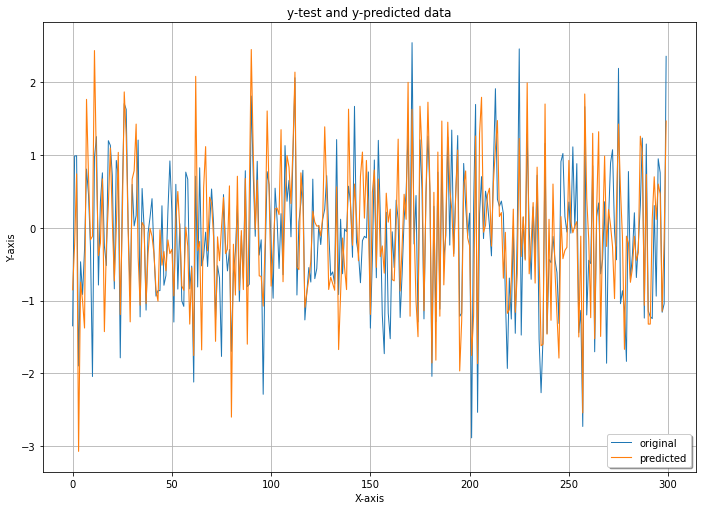

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 